# Titanic: Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [209]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
import string
import warnings
warnings.filterwarnings('ignore')

In [210]:
# Reading Dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Train dataset has <b>891</b> rows and <b>12</b> columns
* Test dataset has **418** and **11** columns
* One extra feature in training set is `Survived` feature, which is the target variable

In [211]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [212]:
def concat_df(df1, df2):
    # Returns a concatenated dataset of train and test data
    df_concat= pd.concat([df1,df2], sort=True).reset_index(drop=True)
    return df_concat

def split_df(df):
    # Returns a divided dataset of training and test set
    return df.loc[:890], df.loc[891:].drop('Survived', axis=1)

In [213]:
df_all = concat_df(df_train,df_test)
# Naming the concatenated dataset
df_all.name = 'All Set'
df_all.shape

(1309, 12)

In [214]:
# Creating a list of train data and test data
dfs= [df_train,df_test]

## Exploratory Data Analysis

### Overview

* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (<b>0</b> or <b>1</b>):
    - <b>1 = Survived</b>
    - <b>0 = Not Survived</b>
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has <b>3</b> unique values (<b>1</b> ,  <b>2</b> or <b>3</b>):
    - <b>1 = Upper Class</b>
    - <b>2 = Middle Class</b>
    - <b>3 = Lower Class</b>
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has <b>3</b> unique values (<b>C</b>, <b>Q</b> or <b>S</b>):
    - <b>C = Cherbourg</b>
    - <b>Q = Queenstown</b>
    - <b>S = Southampton</b>

In [215]:
# For train dataset
print(df_train.info())
# Randomly picks 4 samples from the dataset
df_train.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S


In [216]:
# For test dataset
print(df_test.info())
df_test.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,952,3,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
123,1015,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


###  Missing Values
As seen from below, some columns have missing values. `display_missing` is a function which shows the count of missing values in every column in both training and test set.
* Training set have missing values in `Age`, `Cabin` and `Embarked` columns
* Test set have missing values in `Age`, `Cabin` and `Fare` columns

It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples. The count of missing values in `Age`, `Embarked` and `Fare` are smaller compared to total sample, but roughly **80%** of the `Cabin` is missing. Missing values in `Age`, `Embarked` and `Fare` can be filled with descriptive statistical measures but that wouldn't work for `Cabin`.

In [217]:
def missing_values(df):
    for col in df.columns:
        print('{} column missing value(s): {}'.format(col, df[col].isnull().sum()))

    

In [218]:
for df in dfs:
    print('{}'.format(df.name))
    missing_values(df)
    print('-'*30)

Training Set
PassengerId column missing value(s): 0
Survived column missing value(s): 0
Pclass column missing value(s): 0
Name column missing value(s): 0
Sex column missing value(s): 0
Age column missing value(s): 177
SibSp column missing value(s): 0
Parch column missing value(s): 0
Ticket column missing value(s): 0
Fare column missing value(s): 0
Cabin column missing value(s): 687
Embarked column missing value(s): 2
------------------------------
Test Set
PassengerId column missing value(s): 0
Pclass column missing value(s): 0
Name column missing value(s): 0
Sex column missing value(s): 0
Age column missing value(s): 86
SibSp column missing value(s): 0
Parch column missing value(s): 0
Ticket column missing value(s): 0
Fare column missing value(s): 1
Cabin column missing value(s): 327
Embarked column missing value(s): 0
------------------------------


### Age
Random Sample Imputation method is used here to fill null values in  `Age` feature. The following `random_sample_impute` function takes dataframe and a variable/feature of the dataframe and randomly picks the data from the given feature after removing all its null values and imputes(index wise) those randomly picked values to another column(copied column of the given variable as shown in the first line of the function).

In [219]:
def rand_sample_impute(df, variable):
    # copying the column with new named feature
    df[variable+'_random'] = df[variable]
    # It will have the random samples to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # pandas need to have same indices im order to merge the data seta
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [220]:
# Calling the function for the Age feature
rand_sample_impute(df_all, 'Age')

#### KDE Plot
After random imputation of the `Age` data samples to the null values in the `Age` feature, we can clearly see from the below kernel distributor that there are negligible deviation between the previous `Age` distibution curve and the current `Age_random` curve. We can conclude that the new distribution we got from the random imputation method is almost same to that of the previously given `Age` distribution

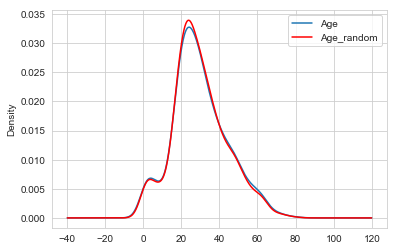

In [221]:
# Showing a kde(kernel distribution estimator) plot to compare the distribution of Data of Age feature
fig = plt.figure()
ax = fig.add_subplot(111)
df_all.Age.plot(kind = 'kde', ax=ax)
df_all.Age_random.plot(kind ='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [222]:
# Dropping the previous Age features (Age feature which has null values)
df_all.drop('Age', axis=1, inplace=True)

In [223]:
# Renaming the newly formed Age feaure(from the random_sample_impute function) to avoid future confusions
df_all.rename(columns={'Age_random': 'Age'}, inplace=True)
df_all.head()

,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age
0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,22.0
1,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,38.0
2,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,26.0
3,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,35.0
4,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,35.0


#### Embarked

Embarked is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. The mode Embarked value for an upper class female passenger is C (Cherbourg), but this doesn't necessarily mean that they embarked from that port.

In [224]:
df_all[df_all['Embarked'].isnull()]

,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age
61,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,38.0
829,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,62.0


When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).
> *Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.*

Missing values in Embarked are filled with S with this information.

In [225]:
df_all['Embarked']= df_all['Embarked'].fillna('S')

#### Fare

There is only one missing value for `Fare`, we can assume that the `Fare` depends on the family size(`Parch` and `SibSp`) and `PClass` feature obviously. Median `Fare` value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [226]:
df_all[df_all['Fare'].isnull()]

,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age
1043,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,60.5


In [227]:
median_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(median_fare)

#### Cabin

A large portion of `Cabin` feature is missing and the feature itself cannot be ignored as this feature may have played an important role in the survival of the passanger. As the first letter of the `Cabin` feature indicated the deck name in which it was situated. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.<br>
<br>

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Titanic_side_plan_annotated_English.png/1100px-Titanic_side_plan_annotated_English.png)
<br>
* On the Boat Deck there were <b>6</b> rooms labeled as <b>T, U, W, X, Y, Z</b> but only the <b>T</b> cabin is present in the dataset
* <b>A</b>, <b>B</b> and <b>C</b> decks were only for 1st class passengers
* <b>D</b> and <b>E</b> decks were for all classes
* <b>F</b> and <b>G</b> decks were for both 2nd and 3rd class passengers
* From going <b>A</b> to <b>G</b>, distance to the staircase increases which might be a factor of survival

In [228]:
# Creating a Deck feature from the first letter of the cabin column (M stands for Missing)
df_all['Deck']= df_all['Cabin'].apply(lambda x : x[0] if pd.notnull(x) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
print(df_all_decks)

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1


In [229]:
def get_pclass_dist(df):
    
    # Creating a dictionary inside a dictionary for passenger class count in every deck
    deck_counts = { 'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}, 'T':{}}
    # stroring deck names in "decks" variable
    decks = df.columns.levels[0]
    
    for deck in decks:
        for pclass in range(1,4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass]=count
            except KeyError:
                deck_counts[deck][pclass]=0
      
    # Creating data frame of the deck_counts dictionary
    df_decks = pd.DataFrame(deck_counts)
    print(df_decks.head())
    print('-'*30)
    deck_percentage = {}
    # Calculating the percentage of every passenger class count in every deck and storing to a dictionary
    for col in df_decks.columns:
        deck_percentage[col]= [(counts/df_decks[col].sum())*100 for counts in df_decks[col]]
 
  
    return deck_counts, deck_percentage
    

In [230]:
all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
all_deck_per

    A   B   C   D   E   F  G    M  T
1  22  65  94  40  34   0  0   67  1
2   0   0   0   6   4  13  0  254  0
3   0   0   0   0   3   8  5  693  0
------------------------------


{'A': [100.0, 0.0, 0.0],
 'B': [100.0, 0.0, 0.0],
 'C': [100.0, 0.0, 0.0],
 'D': [86.95652173913044, 13.043478260869565, 0.0],
 'E': [82.92682926829268, 9.75609756097561, 7.317073170731707],
 'F': [0.0, 61.904761904761905, 38.095238095238095],
 'G': [0.0, 0.0, 100.0],
 'M': [6.607495069033531, 25.04930966469428, 68.34319526627219],
 'T': [100.0, 0.0, 0.0]}

In [231]:
def display_pclassa_dist(percentage):
    df_percentage = pd.DataFrame(percentage).transpose()
    deck_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T']
    bar_count = np.arange(len(deck_names))
    bar_width = 0.8
    
    pclass1 = df_percentage[0]
    pclass2 = df_percentage[1]
    pclass3 = df_percentage[2]
    
    plt.figure(figsize=(20,10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor= 'black', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom= pclass1, color='#f9bc86', edgecolor='black', width=bar_width, label = 'Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1+pclass2, color='#a3acff', edgecolor='black', width = bar_width, label = 'Passenger Class 3')
    
    plt.xlabel('Decks', size=15, labelpad=20 )
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(ticks= bar_count, labels= deck_names)
    plt.tick_params(labelsize=15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)
    
    plt.show()
    
    

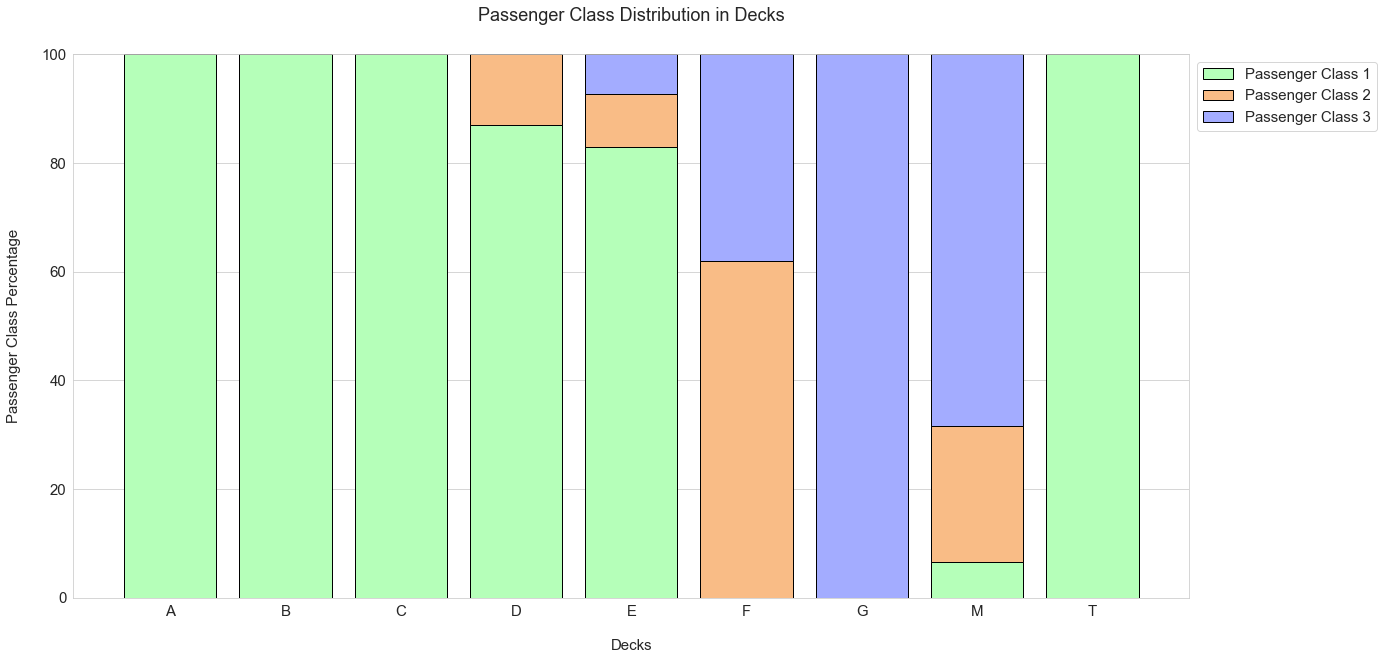

In [232]:
display_pclassa_dist(all_deck_per)

From the above bar graph representation it has been observed that:
<br>
* 100% of the <b>A, B</b> and <b>C</b> decks were occupied by the 1st class passengers.
* 86.95% of the <b>D</b> deck was occupied by the 1st class and the remaining 13.05% was occupied by the 2nd class passengers.
* 82.92% of the <b>E</b> deck was occupied by the 1st class, 9.75% was occupied by the 2nd class and the rest 7.31% was occupied by the 3rd class passengers.
* 61.90% of the <b>F</b> deck was occupied by the 2nd class and the remaining 38.10% was occupied by the 3rd class passengers.
* All of the 100% of <b>G</b> deck was occupied by the 3rd class passengers.
* There is one person on the boat deck in <b>T</b> cabin and he is a 1st class passenger. <b>T</b> cabin passenger has the closest resemblance to <b>A</b> deck passengers so he is grouped with <b>A</b> deck.
* Passengers labeled as <b>M</b> are the missing values in `Cabin` feature. I don't think it is possible to find those passengers' real `Deck` so I decided to use <b>M</b> like a deck


In [233]:
# Changing passenger in the T deck to A.
index = df_all[df_all['Deck']=='T'].index
df_all['Deck'][index]='A'


In [234]:
df_all_decks_surv = df_all.groupby(['Deck', 'Survived']).count().drop(columns = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns ={'Name': 'Count'}).transpose()
df_all_decks_surv

Deck       A       B       C       D       E       F       G        M     
Survived 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0  0.0  1.0
Count      9   7  12  35  24  35   8  25   8  24   5   8   2   2  481  206

In [235]:
def get_surv_dist(df):
    
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]
    
    for deck in decks:
        for surv in range(0,2):
            surv_counts[deck][surv] = df[deck][surv][0]
    
    df_surv_count = pd.DataFrame(surv_counts)
    print(df_surv_count)
    print('-'*30)
    df_percentage = {}
    
    for col in df_surv_count.columns:
        df_percentage[col] = [(count/df_surv_count[col].sum())*100 for count in df_surv_count[col]]
    
    return surv_counts, df_percentage

In [236]:
all_surv_count, all_surv_per = get_surv_dist(df_all_decks_surv)
all_surv_per

   A   B   C   D   E  F  G    M
0  9  12  24   8   8  5  2  481
1  7  35  35  25  24  8  2  206
------------------------------


{'A': [56.25, 43.75],
 'B': [25.53191489361702, 74.46808510638297],
 'C': [40.67796610169492, 59.32203389830508],
 'D': [24.242424242424242, 75.75757575757575],
 'E': [25.0, 75.0],
 'F': [38.46153846153847, 61.53846153846154],
 'G': [50.0, 50.0],
 'M': [70.01455604075691, 29.985443959243085]}

In [237]:
def display_surv_dist(percentage):
    df_percentage = pd.DataFrame(percentage).transpose()
    
    deck_names =  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M']
    bar_count = np.arange(len(deck_names))
    bar_width =0.8
    
    surv_0= df_percentage[0]
    surv_1= df_percentage[1]
    
    plt.figure(figsize=(20,10))
    plt.bar(bar_count, surv_0, color = '#b5ffb9',edgecolor='black', width=bar_width,label ='Not Survived')
    plt.bar(bar_count, surv_1, bottom= surv_0, color = '#f9bc86',edgecolor='black', width = bar_width, label = 'Survived')
    plt.xlabel('Decks', size = 15)
    plt.ylabel('Survived Percentage', size =15)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(labelsize=15)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

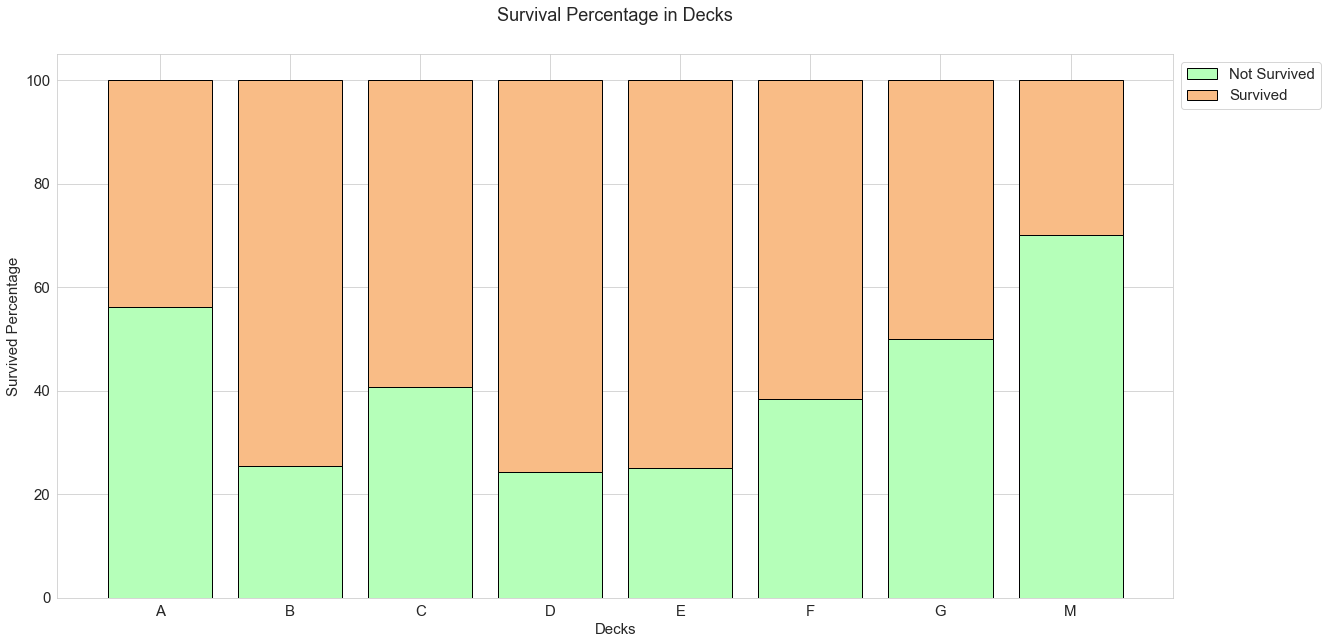

In [238]:
display_surv_dist(all_surv_per)

Every deck has different survival rates and that information can't be discarded. Deck <b>B</b>, <b>C</b>, <b/>D</b> and <b>E</b> have the highest survival rates. Those decks are mostly occupied by 1st class passengers. <b>M</b> has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers. To conclude, cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers. In my opinion <b>M</b> (Missing `Cabin` values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims. That's why I believe labeling that group as <b>M</b> is a reasonable way to handle the missing data. It is a unique group with shared characteristics. `Deck` feature has high-cardinality right now so some of the values are grouped with each other based on their similarities.
* <b>A</b>, <b>B</b> and <b>C</b> decks are labeled as <b>ABC</b> because all of them have only 1st class passengers
* <b>D</b> and <b>E</b> decks are labeled as </b>DE</b> because both of them have similar passenger class distribution and same survival rate
* <b>F</b> and <b>G</b> decks are labeled as <b>FG</b> because of the same reason above
* <b>M</b> deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [239]:
df_all['Deck']= df_all['Deck'].replace(['A','B','C'], 'ABC')
df_all['Deck']= df_all['Deck'].replace(['D','E'], 'DE')
df_all['Deck']= df_all['Deck'].replace(['F','G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

After filling the missing values in Age, Embarked, Fare and Deck features, there is no missing value left in both training and test set. Cabin is dropped because Deck feature is used instead of it.

In [240]:
# Dropping the cabin feature
df_all.drop('Cabin', axis=1, inplace=True)

In [241]:
# Splitting the dataset
df_train, df_test = split_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    missing_values(df)
    print('-'*30)

Embarked column missing value(s): 0
Fare column missing value(s): 0
Name column missing value(s): 0
Parch column missing value(s): 0
PassengerId column missing value(s): 0
Pclass column missing value(s): 0
Sex column missing value(s): 0
SibSp column missing value(s): 0
Survived column missing value(s): 0
Ticket column missing value(s): 0
Age column missing value(s): 0
Deck column missing value(s): 0
------------------------------
Embarked column missing value(s): 0
Fare column missing value(s): 0
Name column missing value(s): 0
Parch column missing value(s): 0
PassengerId column missing value(s): 0
Pclass column missing value(s): 0
Sex column missing value(s): 0
SibSp column missing value(s): 0
Ticket column missing value(s): 0
Age column missing value(s): 0
Deck column missing value(s): 0
------------------------------


342 out of 891 passengers survived which is 38.38% of the training dataset 
549 out of 891 passengers did not survived which is 61.62% of the training dataset 


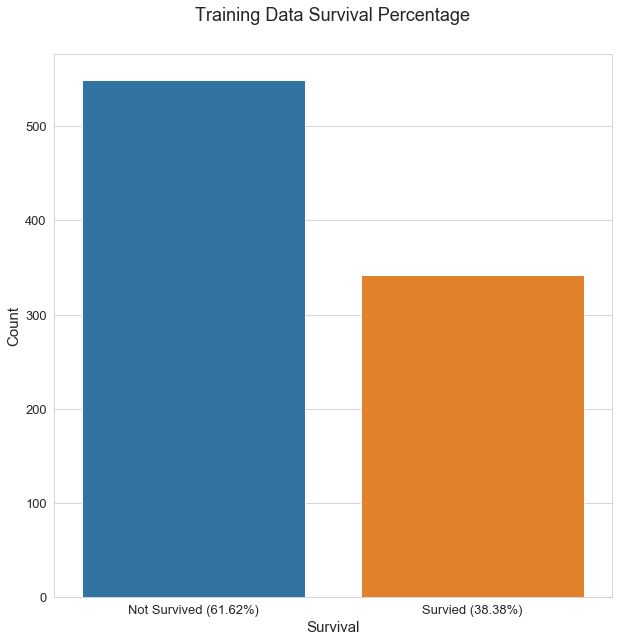

In [242]:
survived = df_train['Survived'].value_counts()[1]
Not_survived = df_train['Survived'].value_counts()[0]

surv_per = (survived/df_train.shape[0])*100
not_surv_per = (Not_survived/df_train.shape[0])*100

print('{} out of {} passengers survived which is {:.2f}% of the training dataset '.format(survived, df_train.shape[0], surv_per))
print('{} out of {} passengers did not survived which is {:.2f}% of the training dataset '.format(Not_survived, df_train.shape[0], not_surv_per))

plt.figure(figsize=(10,10))
sns.countplot(df_train['Survived'])
plt.xlabel('Survival', size=15)
plt.ylabel('Count', size=15)
plt.xticks((1,0), ['Survied ({:.2f}%)'.format(surv_per), 'Not Survived ({:.2f}%)'.format(not_surv_per)])
plt.tick_params(labelsize=13)
plt.title('Training Data Survival Percentage', size=18, y=1.05)
plt.show()
                   
                   

#### Correlations
Features are highly correlated with each other and dependent to each other. The highest correlation between features is <b>0.549500</b> in training set and <b>0.577489</b> in test set (between `Fare` and `Pclass`). The other features are also highly correlated. There are <b>9</b> correlations in training set and <b>6</b> correlations in test set that are higher than <b>0.1</b>.

In [243]:
df_train_corr =  df_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={'level_0':'Feature 1', 'level_1': 'Feature 2', 0:'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient']==1.0].index,inplace=True) 


df_test_corr = df_test.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_test_corr.rename(columns={'level_0':'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient']==1].index, inplace=True)



In [244]:
# Training set high correlation
corr = df_train_corr['Correlation Coefficient']>0.1
df_train_corr[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,SibSp,Parch,0.414838
10,Survived,Pclass,0.338481
12,Age,Pclass,0.329573
14,Fare,Survived,0.257307
16,Age,SibSp,0.239082
18,Fare,Parch,0.216225
20,Age,Parch,0.167436
22,SibSp,Fare,0.159651


In [245]:
# Test set high correlation
corr = df_test_corr['Correlation Coefficient']>0.1
df_test_corr[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.577489
8,Age,Pclass,0.430587
10,SibSp,Parch,0.306895
12,Age,Fare,0.305643
14,Fare,Parch,0.230410
16,Fare,SibSp,0.172032


#### Correlation Heatmap

Text(0.5, 1.0, 'Test Set Correlation')

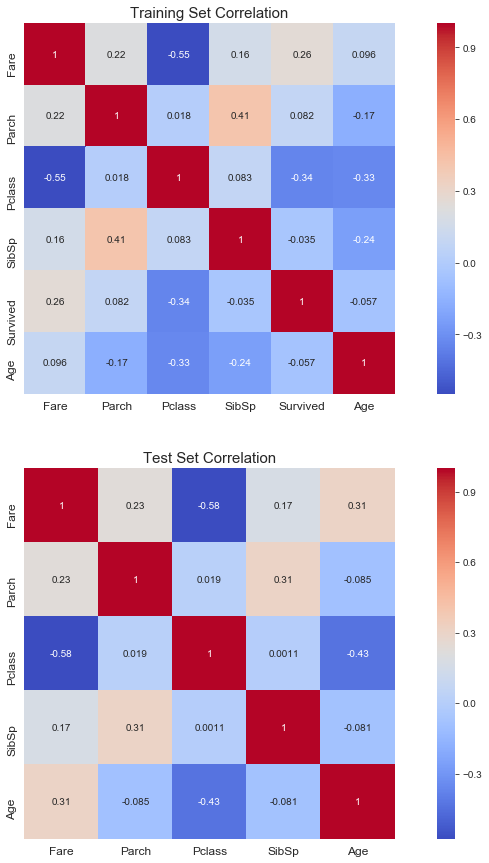

In [246]:
fig, axs = plt.subplots(nrows=2, figsize=(15,15))
sns.heatmap(df_train.drop('PassengerId', axis=1).corr(), ax=axs[0], annot= True, square=True, cmap='coolwarm')
sns.heatmap(df_test.drop('PassengerId', axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm')

axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)

axs[0].set_title('Training Set Correlation', size=15)
axs[1].set_title('Test Set Correlation', size=15)

In [247]:
df_train.head()

,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age,Deck
0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,22.0,M
1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,38.0,ABC
2,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,26.0,M
3,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,35.0,ABC
4,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,35.0,M


### Target Distribution in Features

#### Categorical Features
Every categorical feature has at least one class with high survival rate. Those classes are very helpful to predict whether the passenger is a survivor or victim. Best categorical features are `Pclass` and `Sex` because they have the most homogenous distributions.

* Passengers boarded from **Southampton** has a lower survival rate unlike other ports. More than half of the passengers boarded from **Cherbourg** had survived. This observation could be related to `Pclass` feature
* `Parch` and `SibSp` features show that passengers with only one family member has a higher survival rate

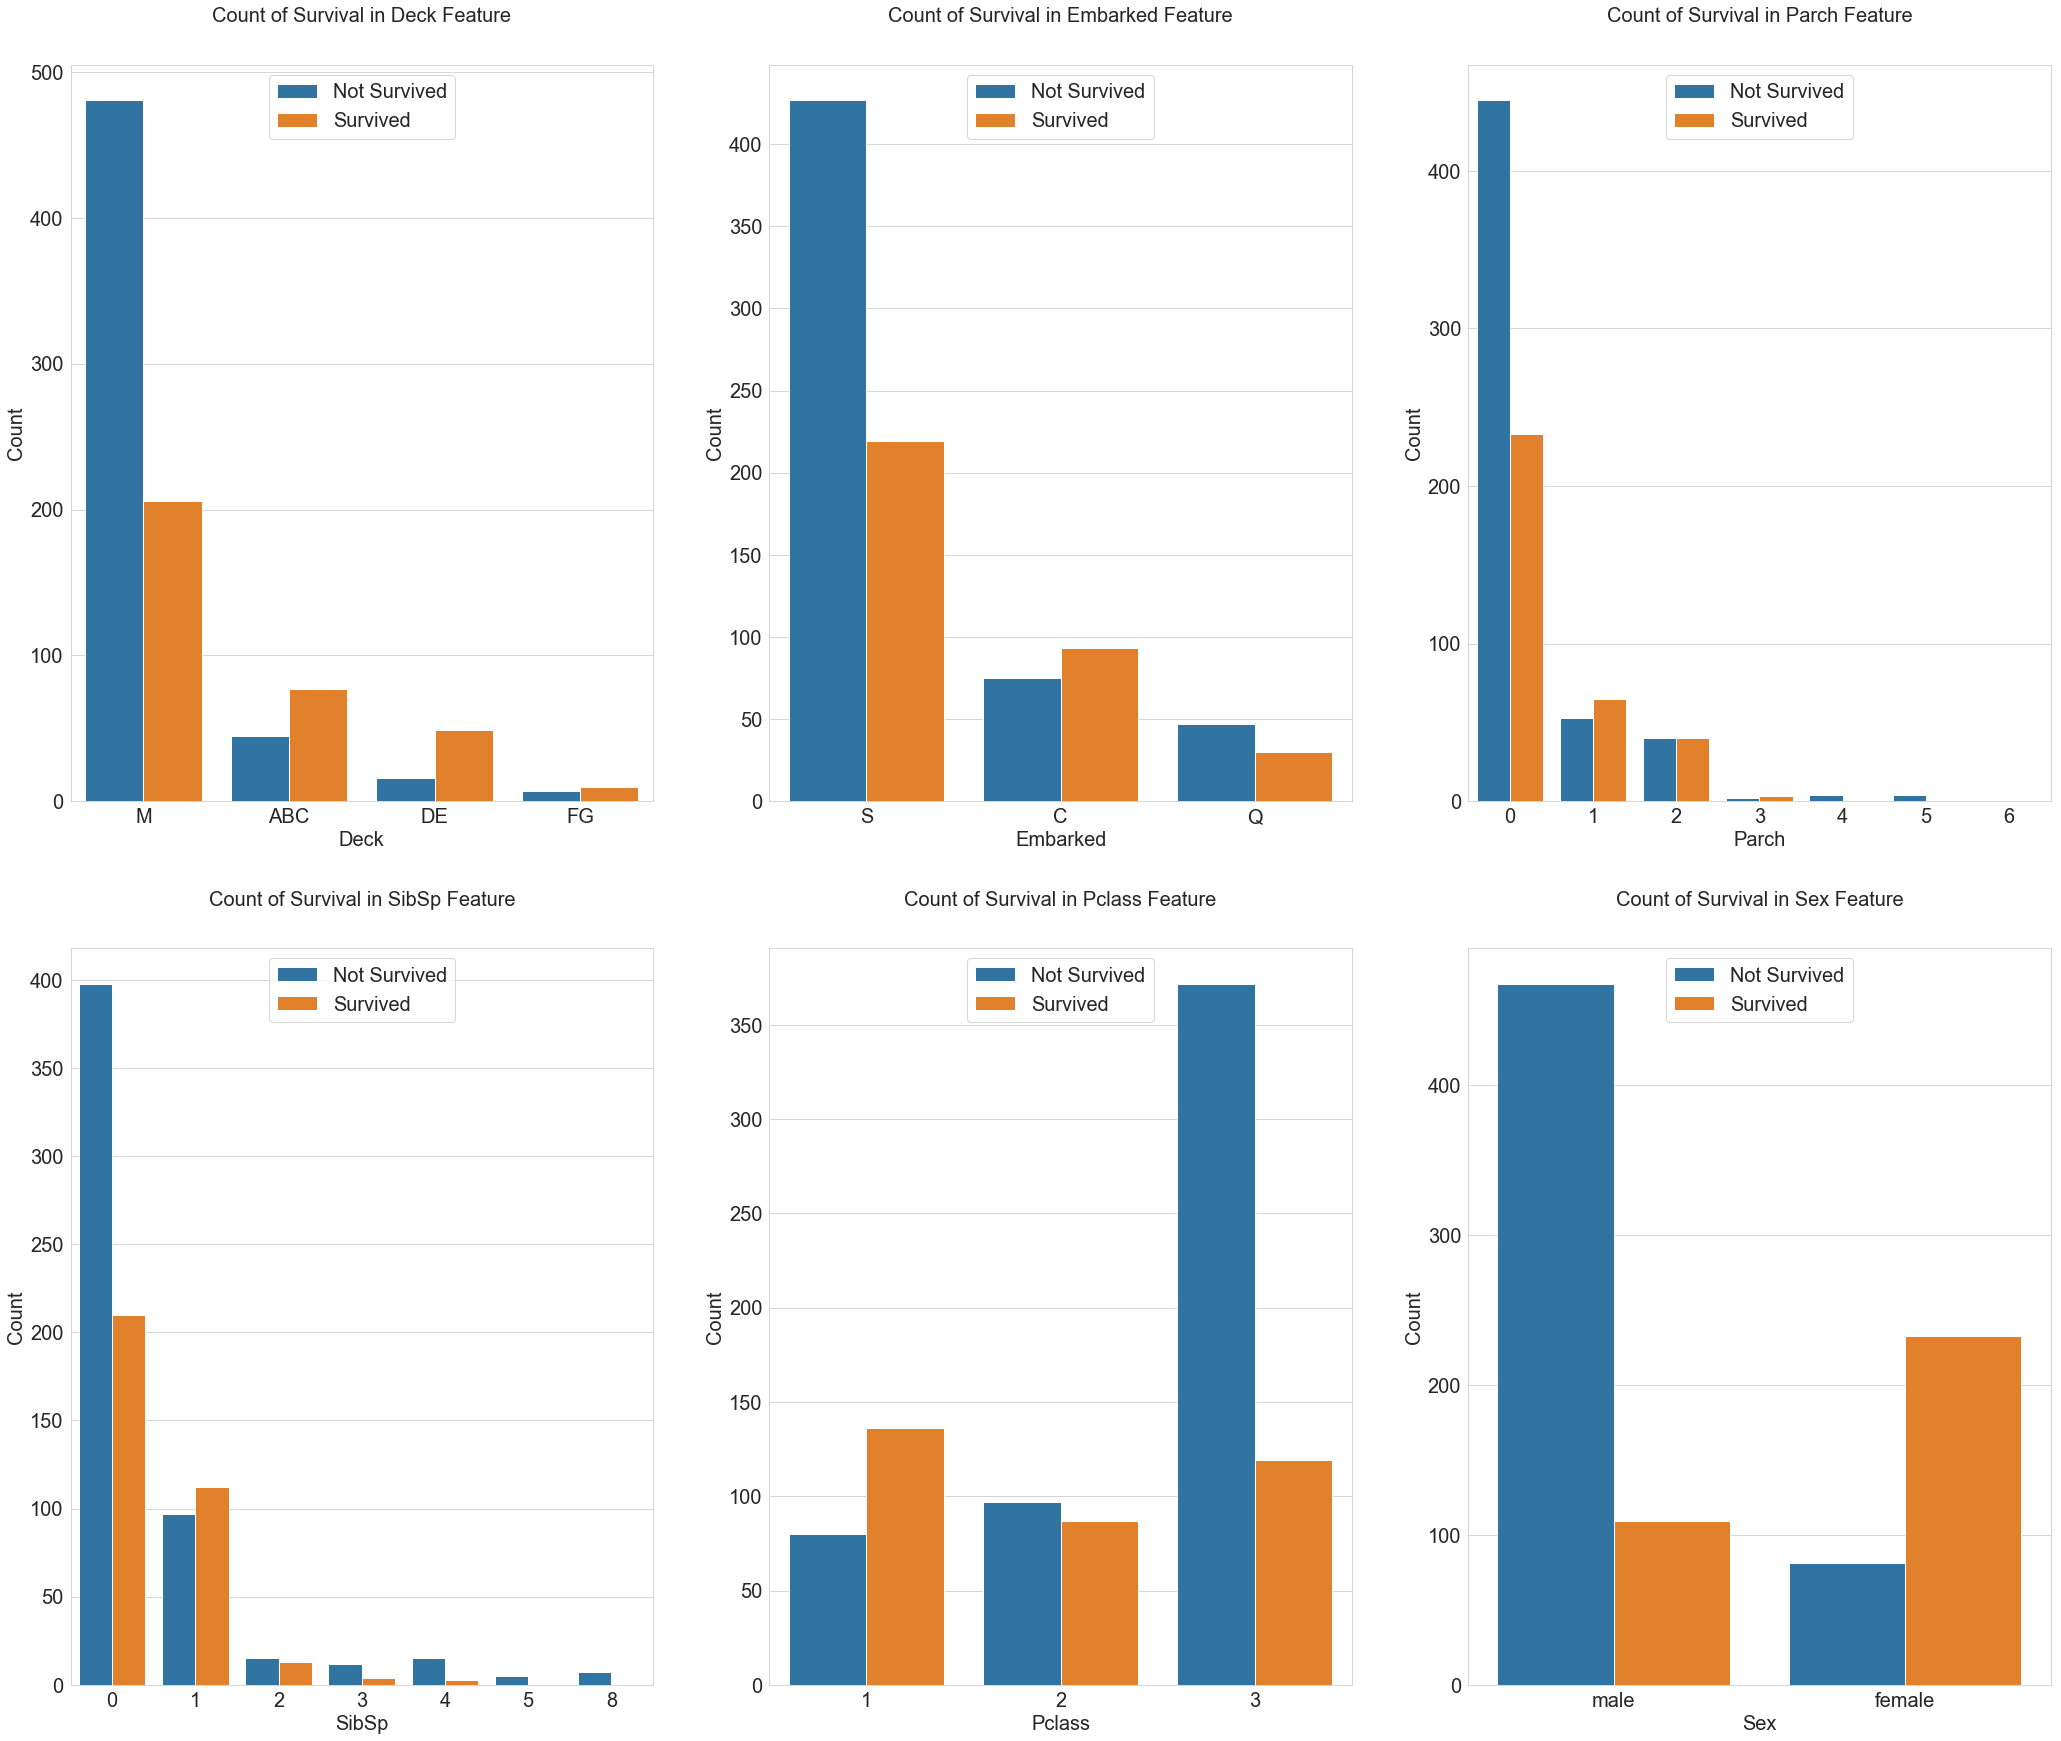

In [248]:
cat_features = ['Deck','Embarked', 'Parch','SibSp', 'Pclass', 'Sex' ]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i,feature in enumerate(cat_features,1):
    plt.subplot(2,3,i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20)
    plt.ylabel('Count', size=20)
    plt.tick_params(labelsize=20)
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size':20})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)


#### Continuous Feature
Both of the continuous features (`Age` and `Fare`) have good split points and spikes for a decision tree to learn. One potential problem for both features is, the distribution has more spikes and bumps in training set, but it is smoother in test set. Model may not be able to generalize to test set because of this reason.

* Distribution of `Age` feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups
* In distribution of `Fare` feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers

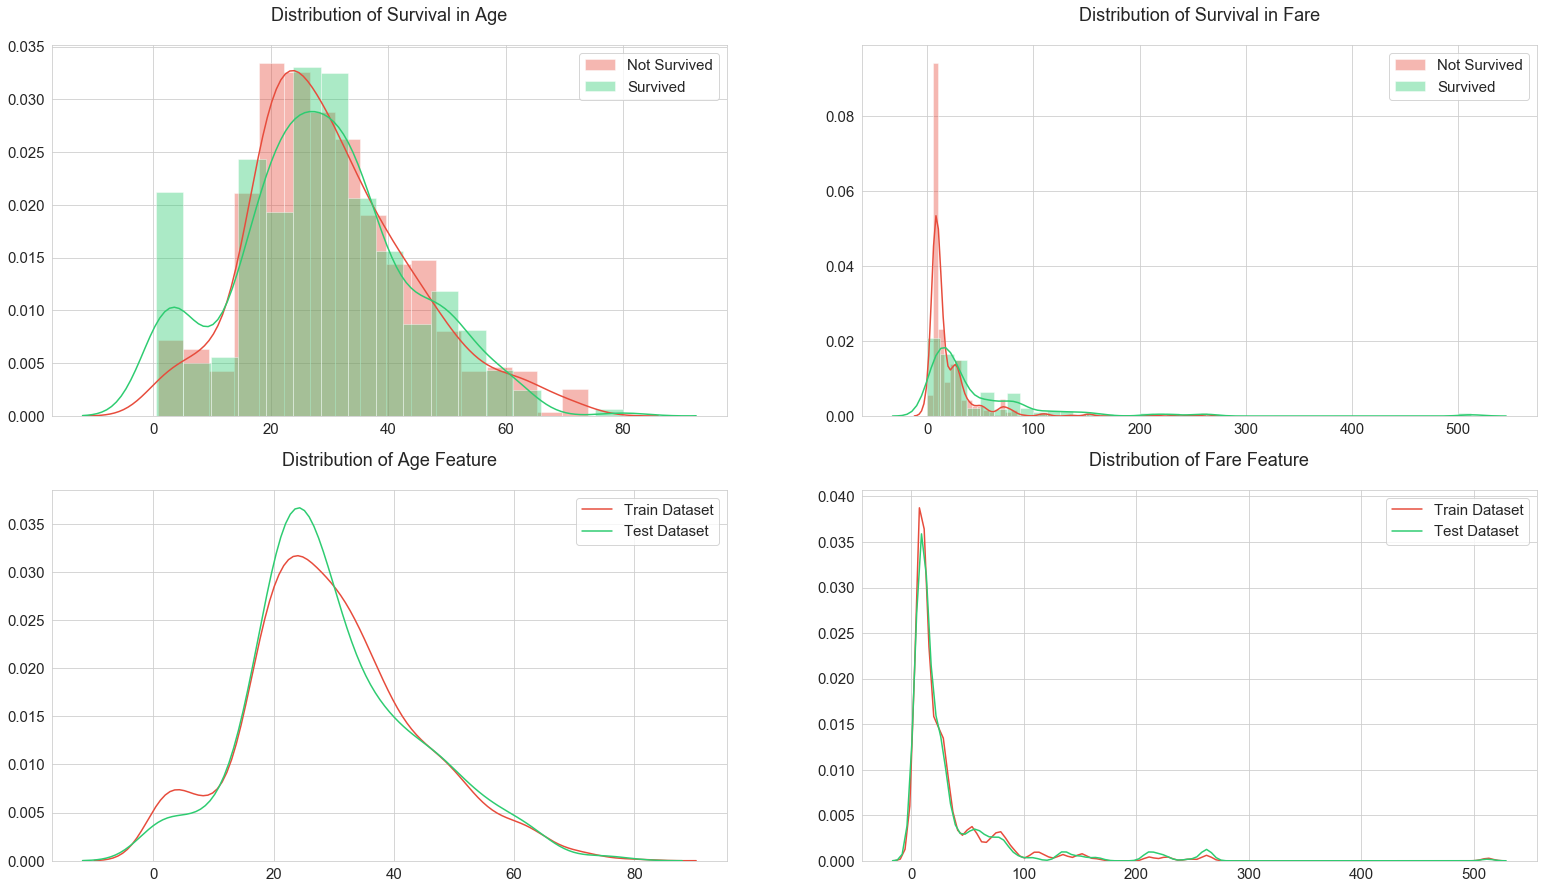

In [249]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived']==1

fig,axs = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
   # Distribution of survival in feature
    sns.distplot(df_train[~surv][feature], label ='Not Survived', hist=True, color='#e74c3c', ax= axs[0][i])
    sns.distplot(df_train[surv][feature], label='Survived', hist=True, color = '#2ecc71', ax=axs[0][i])

    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label= 'Train Dataset', hist=False, color ='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label= 'Test Dataset', hist=False, color ='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):
        axs[i][j].tick_params(labelsize=15)
        
    axs[0][i].legend(loc='upper right', prop={'size': 15})
    axs[1][i].legend(loc='upper right', prop={'size': 15})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=18, y=1.05)
    axs[1][i].set_title('Distribution of {} Feature'.format(feature), size=18, y=1.05)


plt.show()
        

### Conclusion
Most of the features are correlated with each other. This relationship can be used to create new features with feature transformation and feature interaction. Target encoding could be very useful as well because of the high correlations with `Survived` feature.

Split points and spikes are visible in continuous features. They can be captured easily with a decision tree model, but linear models may not be able to spot them.

Categorical features have very distinct distributions with different survival rates. Those features can be one-hot encoded. Some of those features may be combined with each other to make new features.

Created a new feature called `Deck` and dropped `Cabin` feature at the **Exploratory Data Analysis** part.

In [250]:
df_all = concat_df(df_train, df_test)
df_all.shape

(1309, 12)

### Feature Engineering

#### Binning Continuous Features

**1. Fare**

`Fare` feature is positively skewed and survival rate is extremely high on the right end. **13** quantile based bins are used for `Fare` feature. Even though the bins are too much, they provide decent amount of information gain. The groups at the left side of the graph has the lowest survival rate and the groups at the right side of the graph has the highest survival rate. This high survival rate was not visible in the distribution graph. There is also an unusual group **(15.742, 23.25]** in the middle with high survival rate that is captured in this process.

In [251]:
df_all['Fare']= pd.qcut(df_all['Fare'],13)


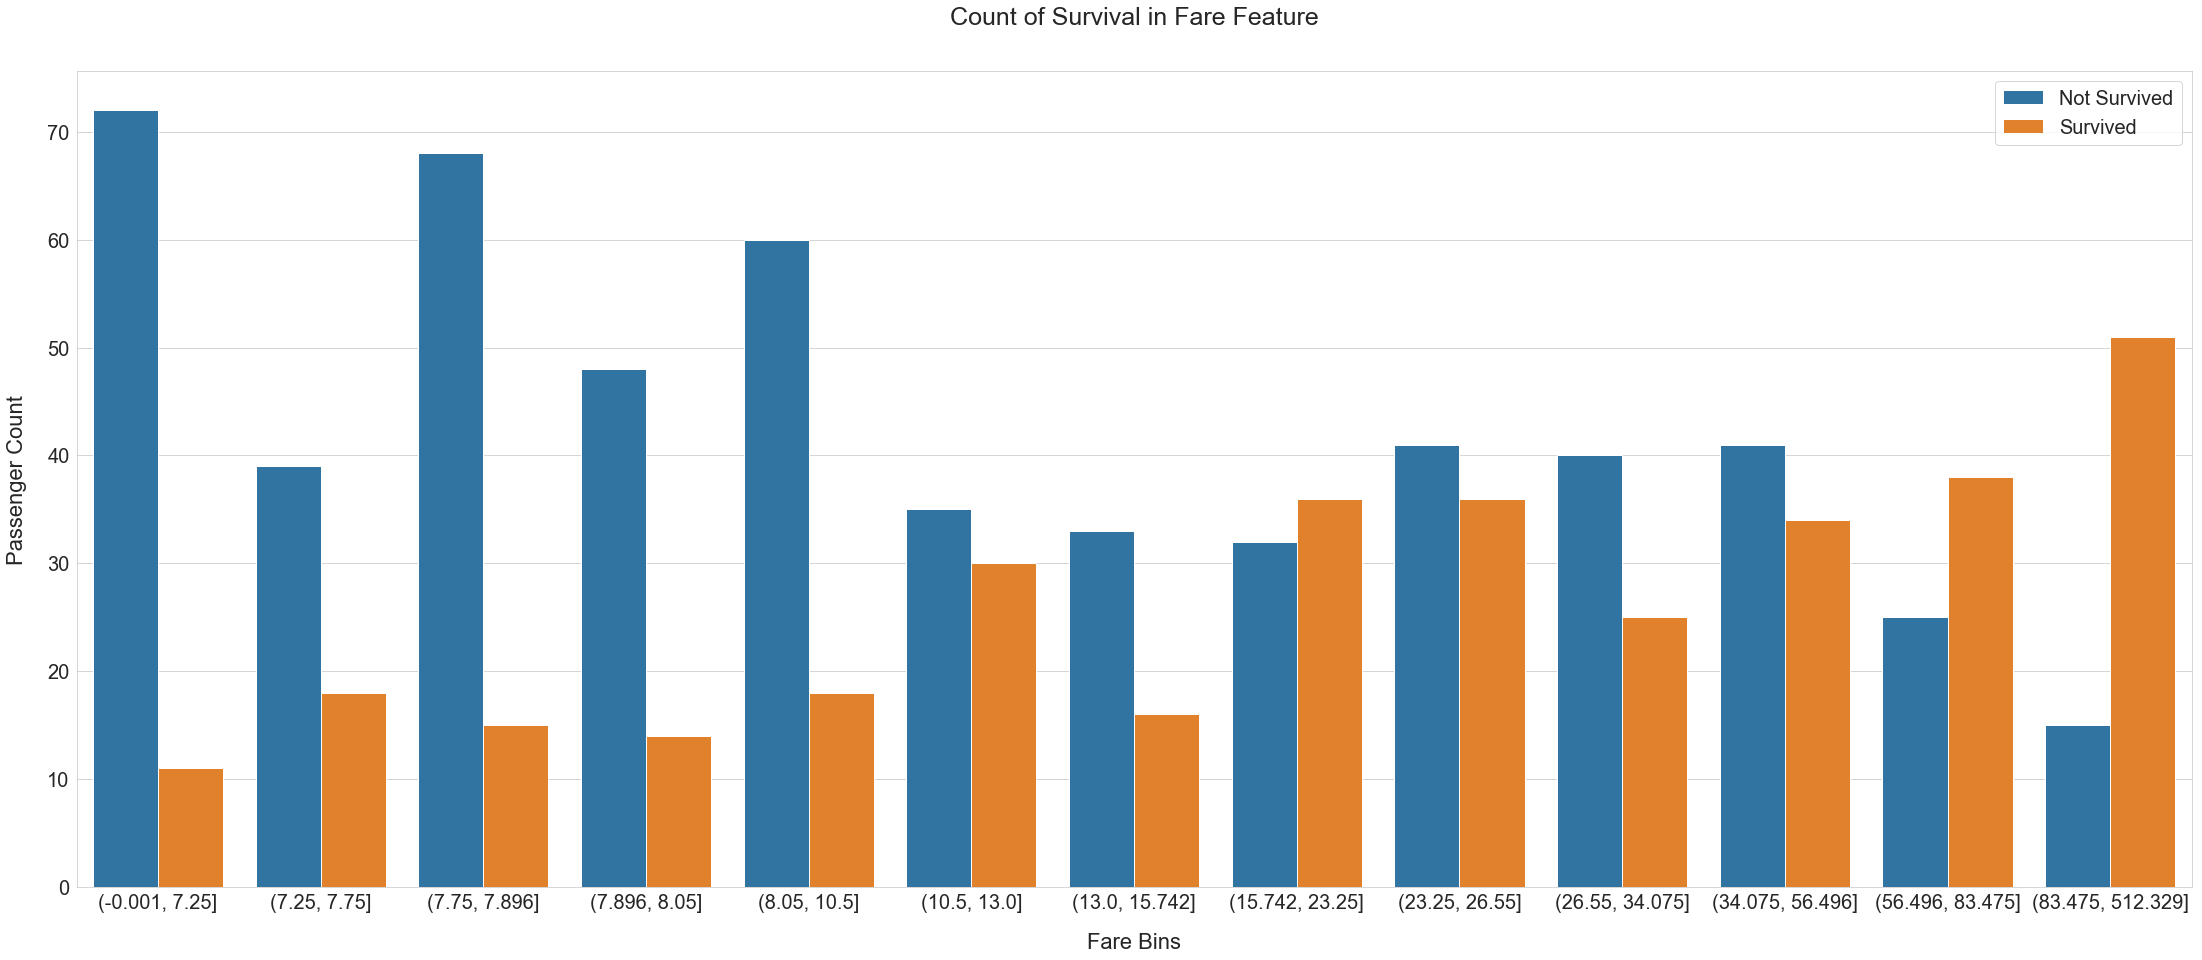

In [257]:
fg, axs = plt.subplots(figsize=(25,15))
sns.countplot(x='Fare', hue='Survived', data=df_all)
plt.subplots_adjust(right=1.3)

plt.xlabel('Fare Bins', size=22, labelpad=20)
plt.ylabel('Passenger Count', size=22, labelpad=20)
plt.tick_params(axis='x',labelsize=20)
plt.tick_params(axis='y',labelsize=20)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':20})
plt.title('Count of Survival in Fare Feature', size=25, y=1.05)
plt.show()

### Age
`Age` feature has a normal distribution with some spikes and bumps and **10** quantile based bins are used for `Age`. The first bin has the highest survival rate and 3rd bin has the lowest survival rate. Those were the biggest spikes in the distribution. 

In [258]:
df_all['Age']= pd.qcut(df_all['Age'],10)

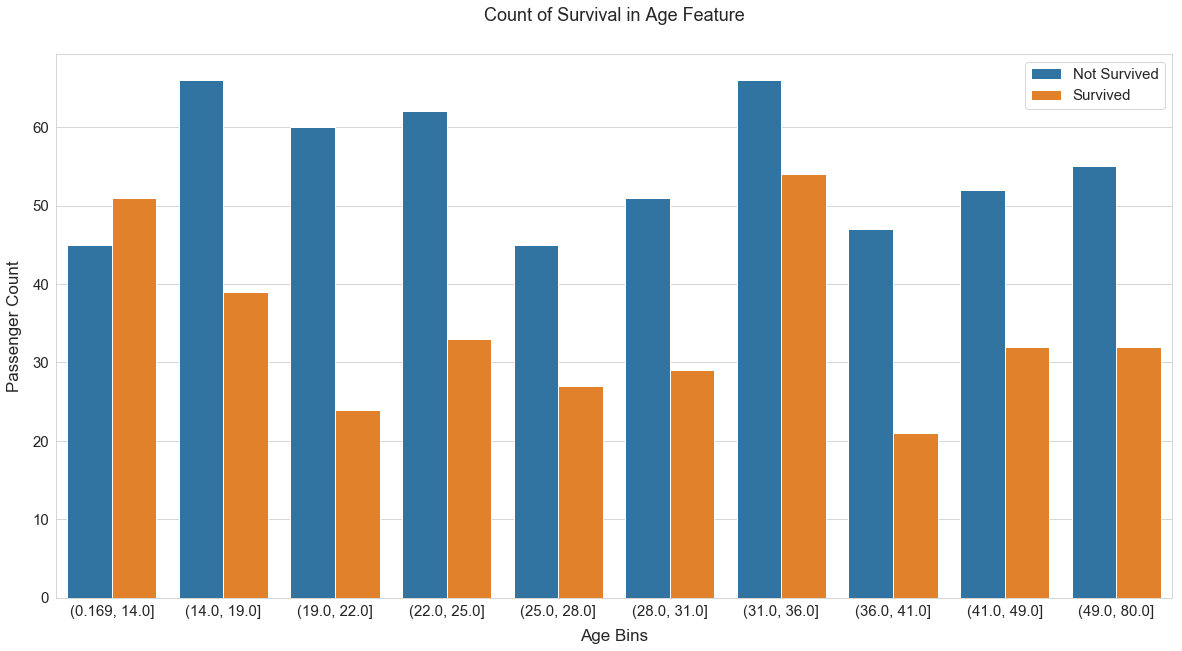

In [259]:
fig, axs = plt.subplots(figsize=(20,10))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age Bins', size=17, labelpad=10)
plt.ylabel('Passenger Count', size=17, labelpad=10)
plt.tick_params(labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in Age Feature', size=18, y=1.05)
plt.show()

### Frequency Encoding
`Family_Size` is created by adding `SibSp`, `Parch` and <b>1</b>. `SibSp` is the count of siblings and spouse, and `Parch` is the count of parents and children. Those columns are added in order to find the total size of families. Adding <b>1</b> at the end, is the current passenger. Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.
* Family Size with <b>1</b> are labeled as <b>Alone</b>
* Family Size with <b>2</b>, <b>3</b> and <b>4</b> are labeled as <b>Small</b>
* Family Size with <b>5</b> and <b>6</b> are labeled as <b>Medium</b>
* Family Size with <b>7</b>, <b>8</b> and <b>11</b> are labeled as <b>Large</b>

In [263]:
# Creating a new feature- Family_Size
df_all['Family_Size']= df_all['SibSp']+df_all['Parch']+1
df_all['Family_Size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_Size, dtype: int64

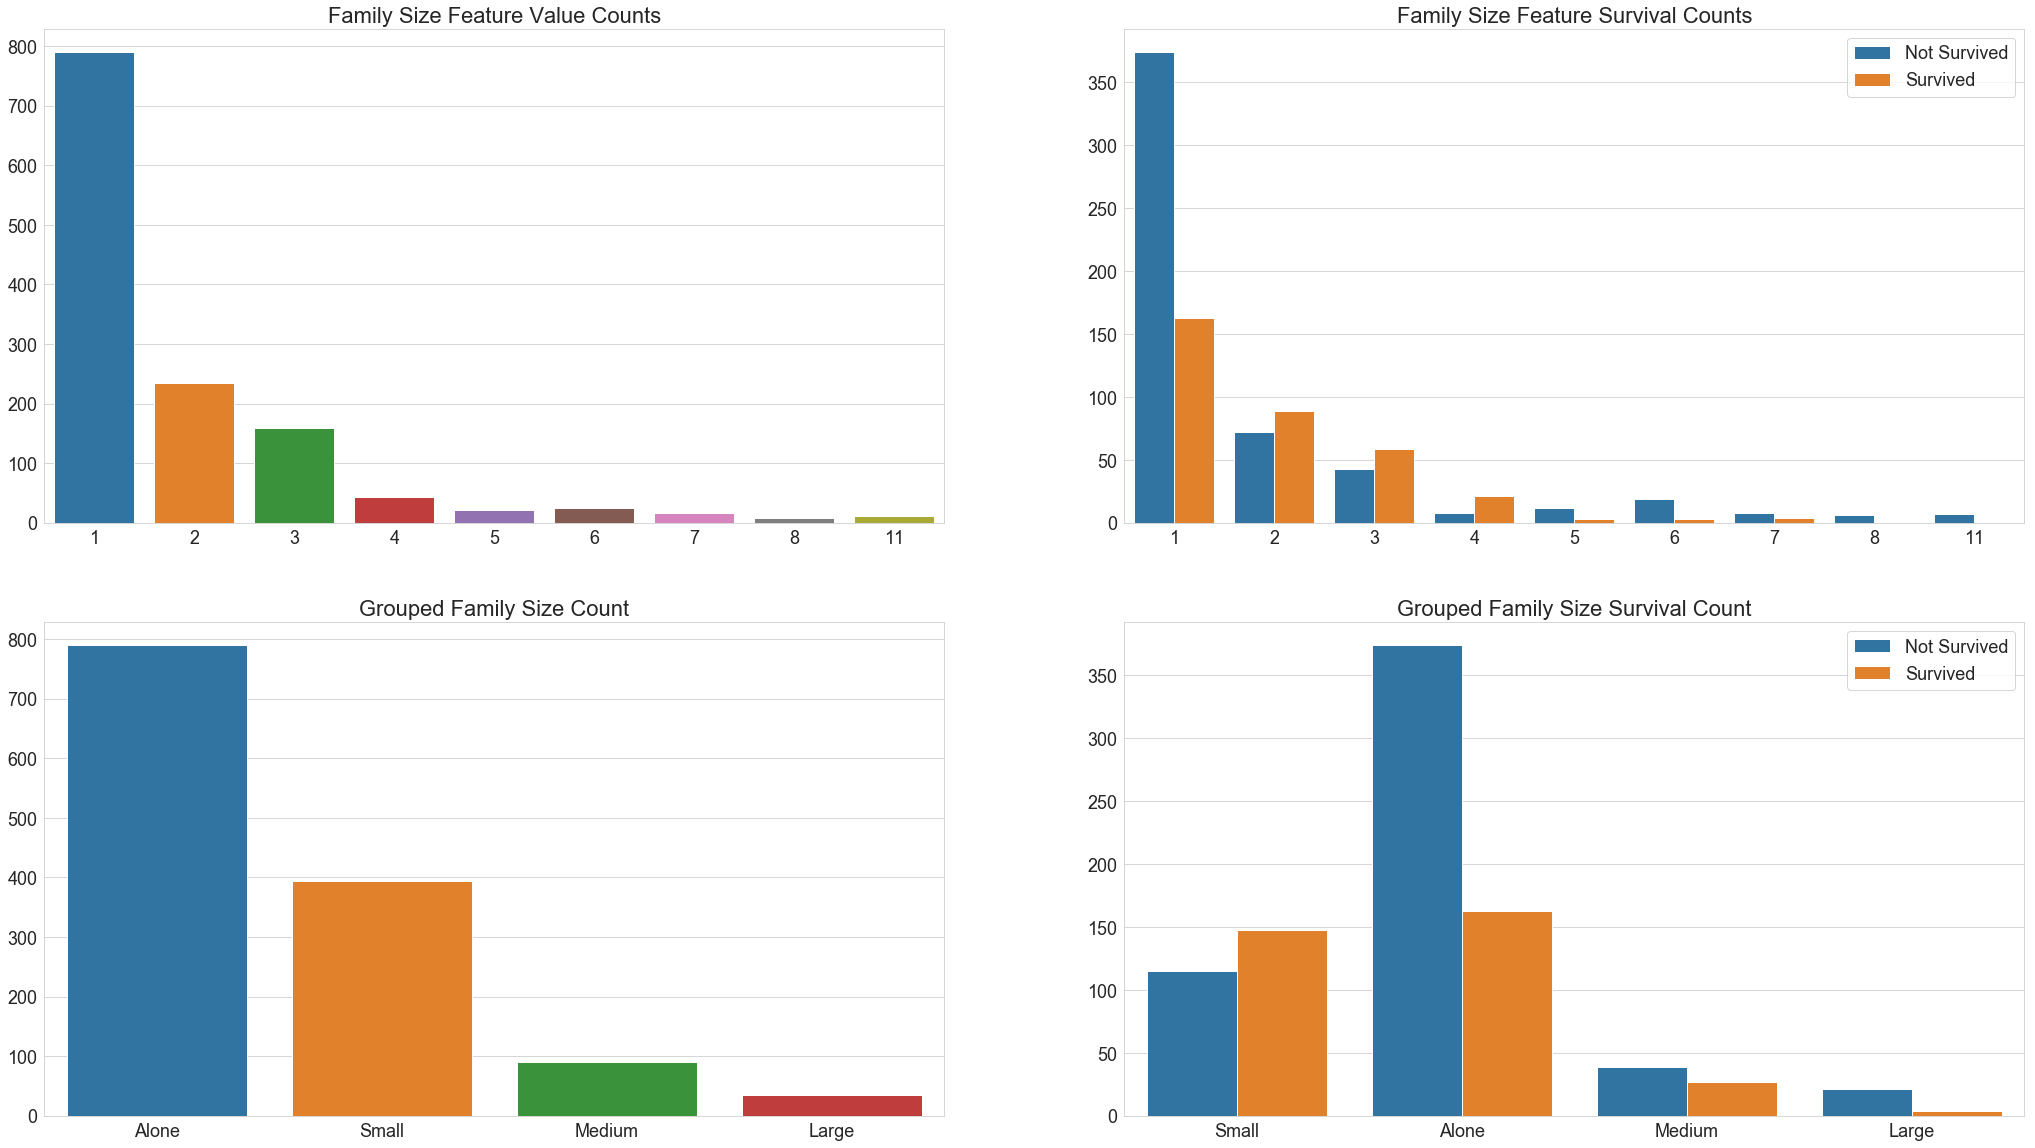

In [264]:
fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(20,20))
plt.subplots_adjust(right=1.5)

# Plotting a bar graph for Family_Size Feature
sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=22)
axs[0][1].set_title('Family Size Feature Survival Counts', size=22)

family_map={1: 'Alone', 2:'Small', 3:'Small', 4:'Medium', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
df_all['Family_Size_Grouped']= df_all['Family_Size'].map(family_map)

# Plotting a bar graph for Family_Size_Grouped Feature
sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived',data=df_all, ax=axs[1][1])

axs[1][0].set_title('Grouped Family Size Count', size=22)
axs[1][1].set_title('Grouped Family Size Survival Count', size=22)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':18})
    for j in range(2):
        axs[i][j].tick_params(labelsize=18)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()


There are too many unique `Ticket` values to analyze, so grouping them up by their frequencies makes things easier.

**How is this feature different than `Family_Size`?** Many passengers travelled along with groups. Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket.

**Why not grouping tickets by their prefixes?** If prefixes in `Ticket` feature has any meaning, then they are already captured in `Pclass` or `Embarked` features because that could be the only logical information which can be derived from the `Ticket` feature.

According to the graph below, groups with <b>2</b>,<b>3</b></b> and <b>4</b> members had a higher survival rate. Passengers who travel alone has the lowest survival rate. After <b>4</b> group members, survival rate decreases drastically. This pattern is very similar to `Family_Size` feature but there are minor differences. `Ticket_Frequency` values are not grouped like `Family_Size` because that would basically create the same feature with perfect correlation. This kind of feature wouldn't provide any additional information gain.

In [265]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')
df_all['Ticket_Frequency'].value_counts()

1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: Ticket_Frequency, dtype: int64

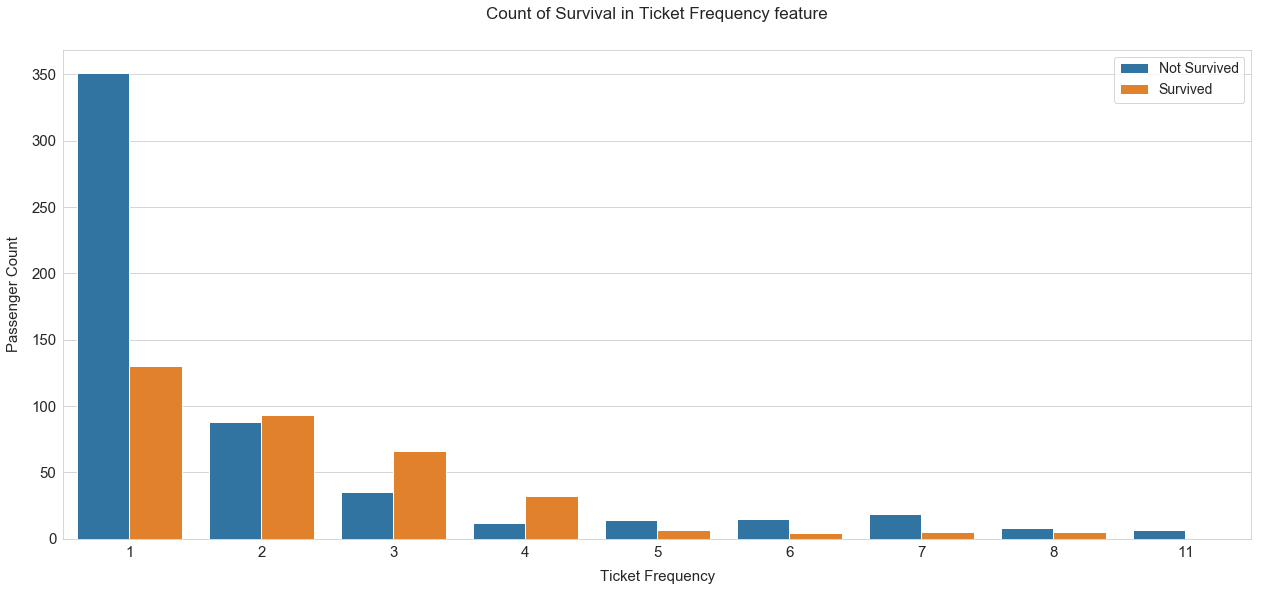

In [266]:
fig,axs= plt.subplots(figsize=(12,9))
plt.subplots_adjust(right=1.5)
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)
plt.xlabel('Ticket Frequency', size=15, labelpad=10)
plt.ylabel('Passenger Count', size=15, labelpad=10)
plt.tick_params(labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':14})
plt.title('Count of Survival in Ticket Frequency feature', size=17, y=1.05)
plt.show()

### Title & Is Married
`Title` is created by extracting the prefix before `Name` feature. According to graph below, there are many titles that are occuring very few times. Some of those titles doesn't seem correct and they need to be replaced. **Miss**, **Mrs**, **Ms**, **Mlle**, **Lady**, **Mme**, **the Countess**, **Dona** titles are replaced with **Miss/Mrs/Ms** because all of them are female. Values like **Mlle**, **Mme** and **Dona** are actually the name of the passengers, but they are classified as titles because `Name` feature is split by comma. **Dr**, **Col**, **Major**, **Jonkheer**, **Capt**, **Sir**, **Don** and **Rev** titles are replaced with **Dr/Military/Noble/Clergy** because those passengers have similar characteristics. **Master** is a unique title. It is given to male passengers below age **26**. They have the highest survival rate among all males.

`Is_Married` is a binary feature based on the **Mrs** title. **Mrs** title has the highest survival rate among other female titles. This title needs to be a feature because all female titles are grouped with each other.

In [267]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1
df_all['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Don               1
Mme               1
Lady              1
Dona              1
Name: Title, dtype: int64

Mr                           757
Mrs/Miss/Ms                  465
Master                        61
Dr/Millitary/Noble/Clergy     26
Name: Title, dtype: int64


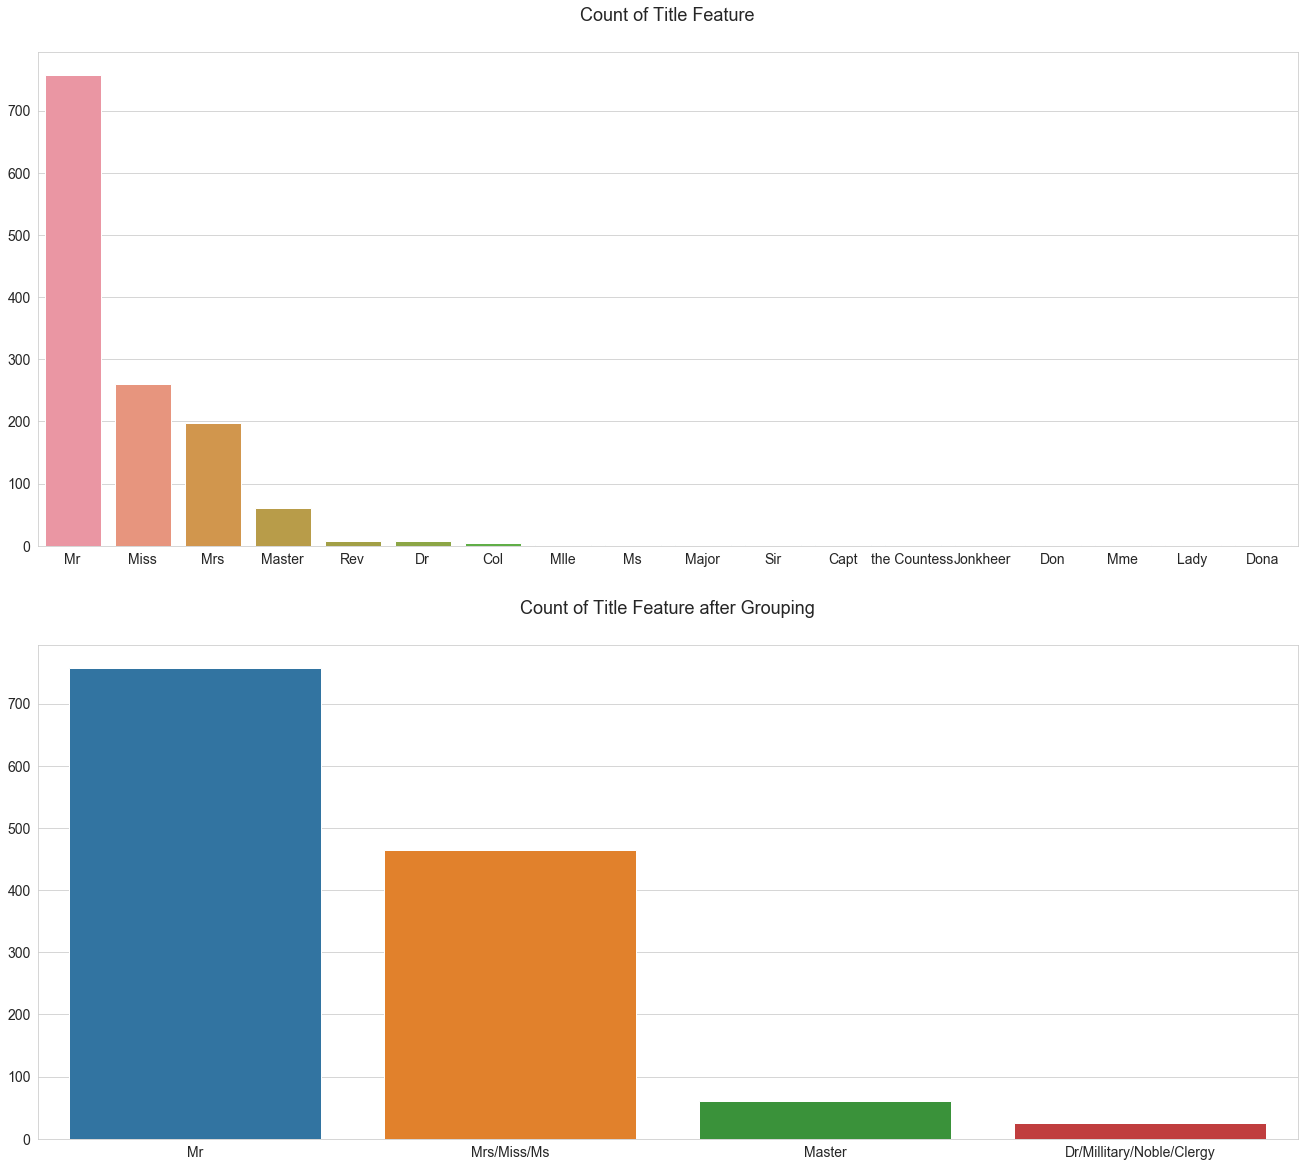

In [268]:
fig, axs= plt.subplots(nrows=2, figsize=(20,20))
plt.subplots_adjust(right=1)
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])
axs[0].set_title('Count of Title Feature', size=18, y=1.05)
axs[0].tick_params(labelsize=14)

df_all['Title']= df_all['Title'].replace(['Miss', 'Mrs', 'Ms', 'Dona', 'Lady', 'Mlle','Mme', 'the Countess'], 'Mrs/Miss/Ms')
df_all['Title']= df_all['Title'].replace(['Rev', 'Dr', 'Col', 'Major','Jonkheer', 'Capt', 'Sir', 'Don'], 'Dr/Millitary/Noble/Clergy')
print(df_all['Title'].value_counts())

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Count of Title Feature after Grouping', size=18, y=1.05)
axs[1].tick_params(labelsize=14)

plt.show()


###  Target Encoding
`extract_surname` function is used for extracting surnames of passengers from the `Name` feature. `Family` feature is created with the extracted surname. This is necessary for grouping passengers in the same family. 

In [269]:
df_all['Name'].sample(10)

222                              Green, Mr. George Henry
2                                 Heikkinen, Miss. Laina
914                      Williams, Mr. Richard Norris II
1071                           McCrie, Mr. James Matthew
629                             O'Connell, Mr. Patrick D
1216                                      Assam, Mr. Ali
1157               Chisholm, Mr. Roderick Robert Crispin
247                      Hamalainen, Mrs. William (Anna)
1069    Becker, Mrs. Allen Oliver (Nellie E Baumgardner)
146         Andersson, Mr. August Edvard ("Wennerstrom")
Name: Name, dtype: object

In [270]:
def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name= data.iloc[i]
        
        if '(' in name:
            no_bracket_name= name.split('(')[0]
        else:
            no_bracket_name = name
        
        family = no_bracket_name.split(', ')[0]
        
        for j in string.punctuation:
            family = family.replace(j, '').strip()
        
        families.append(family)
        
    return families
    

In [271]:
df_train.shape

(891, 12)

In [272]:
df_all['Family']= extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs= [df_train, df_test]
df_all['Family'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Family, dtype: object


`Family_Survival_Rate` is calculated from families in training set since there is no `Survived` feature in test set. A list of family names that are occuring in both training and test set (`non_unique_families`), is created. The survival rate is calculated for families with more than 1 members in that list, and stored in `Family_Survival_Rate` feature.

An extra binary feature `Family_Survival_Rate_NA` is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

`Ticket_Survival_Rate` and `Ticket_Survival_Rate_NA` features are also created with the same method. `Ticket_Survival_Rate` and `Family_Survival_Rate` are averaged and become `Survival_Rate`, and `Ticket_Survival_Rate_NA` and `Family_Survival_Rate_NA` are also averaged and become `Survival_Rate_NA`.

In [273]:
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket_Frequency'].median()

family_rates = {}
ticket_rates ={}

for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i,1]>1:
        family_rates[df_family_survival_rate.index[i]]= df_family_survival_rate.iloc[i,0]

for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i,1]>1:
        ticket_rates[df_ticket_survival_rate.index[i]]= df_ticket_survival_rate.iloc[i,0]


In [274]:
mean_surv = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_surv)
        train_family_survival_rate_NA.append(0)

for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_surv)
        test_family_survival_rate_NA.append(0)

df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

In [275]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_surv)
        train_ticket_survival_rate_NA.append(0)

for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_surv)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [276]:
for df in dfs:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2  


In [277]:
df_train.sample(5)

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA
783,"(31.0, 36.0]",M,S,"(23.25, 26.55]","Johnston, Mr. Andrew G",2,784,3,male,1,...,4,Mr,0,Johnston,0.000000,1,0.000000,1,0.000000,1.0
210,"(22.0, 25.0]",M,S,"(-0.001, 7.25]","Ali, Mr. Ahmed",0,211,3,male,0,...,1,Mr,0,Ali,0.383838,0,0.383838,0,0.383838,0.0
263,"(36.0, 41.0]",ABC,S,"(-0.001, 7.25]","Harrison, Mr. William",0,264,1,male,0,...,1,Mr,0,Harrison,0.383838,0,0.383838,0,0.383838,0.0
158,"(36.0, 41.0]",M,S,"(8.05, 10.5]","Smiljanic, Mr. Mile",0,159,3,male,0,...,1,Mr,0,Smiljanic,0.383838,0,0.383838,0,0.383838,0.0
100,"(25.0, 28.0]",M,S,"(7.75, 7.896]","Petranec, Miss. Matilda",0,101,3,female,0,...,1,Mrs/Miss/Ms,0,Petranec,0.383838,0,0.383838,0,0.383838,0.0


### Feature Transformation

#### Label Encoding Non-Numerical Features
`Embarked`, `Sex`, `Deck` , `Title` and `Family_Size_Grouped` are object type, and `Age` and `Fare` features are category type. They are converted to numerical type with `LabelEncoder`. `LabelEncoder` basically labels the classes from <b>0</b> to <b>n</b>. This process is necessary for models to learn from those features.

In [278]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

non_numeric_features = ['Embarked', 'Deck', 'Sex', 'Title', 'Family_Size_Grouped','Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature]= LabelEncoder().fit_transform(df[feature])
df_train.sample(5)

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA
2,4,3,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,...,1,3,0,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0
845,8,3,2,1,"Abbing, Mr. Anthony",0,846,3,1,0,...,1,2,0,Abbing,0.383838,0,0.383838,0,0.383838,0.0
78,0,3,2,9,"Caldwell, Master. Alden Gates",2,79,2,1,0,...,3,1,0,Caldwell,1.000000,1,1.000000,1,1.000000,1.0
36,6,3,0,0,"Mamee, Mr. Hanna",0,37,3,1,0,...,1,2,0,Mamee,0.383838,0,0.383838,0,0.383838,0.0
720,0,3,2,9,"Harper, Miss. Annie Jessie ""Nina""",1,721,2,0,0,...,3,3,0,Harper,0.383838,0,0.383838,0,0.383838,0.0


####  One-Hot Encoding the Categorical Features
The categorical features (`Pclass`, `Sex`, `Deck`, `Embarked`, `Title`) are converted to one-hot encoded features with `OneHotEncoder`. `Age` and `Fare` features are not converted because they are ordinal unlike the previous ones.

In [279]:
categorical_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features =[]

for df in dfs:
    for feature in categorical_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1,1)).toarray()
        n = df[feature].nunique()
        cols= ['{}_{}'.format(feature,n) for n in range(1,n+1)]
        encoded_df = pd.DataFrame(encoded_feat, columns = cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)
df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)
df_train.shape

(891, 44)

In [280]:
df_train.columns

Index(['Age', 'Deck', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size',
       'Family_Size_Grouped', 'Ticket_Frequency', 'Title', 'Is_Married',
       'Family', 'Family_Survival_Rate', 'Family_Survival_Rate_NA',
       'Ticket_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Survival_Rate',
       'Survival_Rate_NA', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1',
       'Sex_2', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4'],
      dtype='object')

In [281]:
df_all = concat_df(df_train,df_test)
drop_cols = ['Deck', 'Embarked','Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Family_Size','Survived',
                'Family_Size_Grouped', 'Title', 'Family', 'Family_Survival_Rate', 'Family_Survival_Rate_NA',
                 'Ticket_Survival_Rate', 'Ticket_Survival_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)
df_all.head()


,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,0.0,1.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
3,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,0.0,1.0
4,6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,1.0,0.0


### Conclusion
`Age` and `Fare` features are binned. Binning helped dealing with outliers and it revealed some homogeneous groups in those features. `Family_Size` is created by adding `Parch` and `SibSp` features and **1**. `Ticket_Frequency` is created by counting the occurence of `Ticket` values.

`Name` feature is very useful. First, `Title` and `Is_Married` features are created from the title prefix in the names. Second, `Family_Survival_Rate` and `Family_Survival_Rate_NA`  features are created by target encoding the surname of the passengers. `Ticket_Survival_Rate` is created by target encoding the `Ticket` feature. `Survival_Rate` feature is created by averaging the `Family_Survival_Rate` and `Ticket_Survival_Rate` features.

Finally, the non-numeric type features are label encoded and categorical features are one-hot encoded. Created **5** new features (`Family_Size`, `Title`, `Is_Married`, `Survival_Rate` and `Survival_Rate_NA`) and dropped the useless features after encoding.

## Model

In [282]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))


print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 26)
y_train shape: (891,)
X_test shape: (418, 26)


In [185]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
# Creating rf object for RandomForestClassifier
rf = RandomForestClassifier()

# Creating a dictionary of parameters
hyper_para = {
        'n_estimators': [10,15,35, 25,300,500,700,1000,1500],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2,3,5,7,8,10],
        'min_samples_leaf': [10,15,17,23,15,30,35,40,43,50],
        'random_state': [20, 25,27, 31, 44, 18, 35, 40, 101]
}

In [188]:
from sklearn.model_selection import RandomizedSearchCV
r_cv = RandomizedSearchCV(estimator = rf,  param_distributions= hyper_para, 
                         cv=6, n_iter=100, scoring = 'accuracy',
                         n_jobs=-1, verbose=5 , return_train_score=True,
                         random_state=70)

In [189]:
r_cv.fit(X_train,y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.7min finished


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 15, 35, 25, 300, 500, 700, 1000, 1500], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 5, 7, 8, 10], 'min_samples_leaf': [10, 15, 17, 23, 15, 30, 35, 40, 43, 50], 'random_state': [20, 25, 27, 31, 44, 18, 35, 40, 101]},
          pre_dispatch='2*n_jobs', random_state=70, refit=True,
          return_train_score=True, scoring='accuracy', verbose=5)

In [190]:
r_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [192]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [193]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [194]:
rf_pred=rf.predict(X_test)
int_pred= rf_pred. astype(int)
int_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## Submission

In [195]:
# submission
pred = pd.DataFrame(int_pred)
sub_df = pd.read_csv('gender_submission.csv')
dataset = pd.concat([sub_df['PassengerId'],pred], axis=1)
dataset.columns = ['PassengerId', 'Survived']
dataset.to_csv('gender_submission1.csv', index=False)
dataset.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Accuracy on Kaggle Leaderboard: 80.62%
After submitting the test data prediction result, I got an accuracy score of 0.80622 on kaggle leaderboard which is under top 3% of the total submission of this challenge.
